## SBI General Insurance Uses Data to Improve Car Insurance

**About**

Let's start with a bit of background on SBI General Insurance. It's part of the State Bank of India family, one of the biggest and most trusted names in banking. Since starting in 2009, SBI General has grown really fast. They've gone from just 17 branches to over 141 across India and have helped more than 55.55 crore customers!

That's huge, right? And there's more – they've won awards like ‘Insurer of the Year’ in 2020 and 2021, and in 2022, they were named the 'Best General Insurance Company of the Year'.

So, how did they get here? A big part of their success story is data – collecting it, analyzing it, and then using it to make better insurance products for people like you and me.

**Objective**

- The Insurance Manager aims to improve how well the insurance portfolio does by focusing on the areas that make the most money and making better models for figuring out risks. They plan to use what customers say to make their insurance products and customer service better, hoping to make customers happier.

- The Insurance Manager also wants to make their team leaders stronger by giving them more training and encouraging them to work together and come up with new ideas.

**Dataset**

Let's inspect our dataset. The dataset offers a comprehensive overview of the vehicle insurance landscape, providing insights into customer preferences, dealership networks, financing options, and insurance policy choices. This dataset can be valuable for analysing trends in vehicle insurance, assessing regional variations in vehicle sales and insurance coverages, and understanding consumer behavior in the vehicle insurance market. 



**Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# Load the data
data = pd.read_csv('Dataset/vehicle_insurance_data.csv')

In [3]:
# Show Top 5 Records
data.head(3)

,Ã¯Â»Â¿dealer,zone,state,location,policy,pol_id,consumer,pol_type,addon_prod,brand,...,bank,bank_city,package,financer,fin_branch,road_tax,registration_charges,on_road_price,dt_policy_expiry,policy_term_month
0,Spice Route Auto Haven,Central,Madhya Pradesh,Gwalior,ICICI Lombard General,TIL/000000002,Mr. GUNDE GOWDA D J,TP Renewal,Yes,Mercedes-Benz,...,KARNATAKA BANK LIMITED,BANGALORE,ADDON,HONDA FINANCES,BANGALORE,NaN,NaN,767230,2023-11-18,36
1,Lotus Lake Auto Hub,South,Telangana,Suryapet,ICICI Lombard General,TIL/000000003,Mr. SHARANAPPA GOUD,TP Renewal,Yes,MG Motor,...,DHANLAXMI BANK LIMITED,BANGALORE,ADDON,NaN,NaN,NaN,NaN,767230,2023-02-25,12
2,Green Valley Drives,West,Gujarat,Surat,ICICI Lombard General,TIL/000000004,Mr. REVANEPPA H MALAGI,TP Renewal,Yes,BMW,...,DHANLAXMI BANK LIMITED,BANGALORE,ADDON,HONDA FINANCES,BANGALORE,NaN,NaN,751223,2021-02-01,12


In [4]:
# Returns the column labels of the DataFrame
data.columns

Index(['Ã¯Â»Â¿dealer', 'zone', 'state', 'location', 'policy', 'pol_id',
       'consumer', 'pol_type', 'addon_prod', 'brand', 'product',
       'vehicle_type', 'fuel_type', 'transmission', 'dt_pol_create',
       'dt_pol_effect', 'insurance_declared_value', 'addon_premium',
       'rti_premium', 'od_premium', 'third_party_liability', 'pa_cover',
       'legal_liability', 'liability', 'service_tax', 'gross_premium',
       'payment_mode', 'dt_cheque', 'bank', 'bank_city', 'package', 'financer',
       'fin_branch', 'road_tax', 'registration_charges', 'on_road_price',
       'dt_policy_expiry', 'policy_term_month'],
      dtype='object')

In [5]:
# Shape of the dataset
data.shape

(35066, 38)

**Q1. Find Unique Count Of total Customer**

In [6]:
unique_customers = data['consumer'].nunique()
print(f'Total unique customers: {unique_customers}')

Total unique customers: 16886


**Q2. What Is My Unique Count Of total Policy**

In [8]:
unique_policies = data['pol_id'].nunique()
print(f'Total unique policies: {unique_policies}')

Total unique policies: 35064


**Q3. Find out the Total Policies by Year**

In [64]:
# Convert the policy creation date column to datetime
data['dt_pol_create'] = pd.to_datetime(data['dt_pol_create'], errors='coerce')

# Extract the year from the policy creation date:
data['year'] = data['dt_pol_create'].dt.year

#Calculate the yearly total count of policies:
yearly_policy_count = data.groupby('year')['pol_id'].count().reset_index()
yearly_policy_count.columns = ['Year', 'Total Policies']
print(yearly_policy_count)

   Year  Total Policies
0  2020            8744
1  2021            8927
2  2022            8672
3  2023            8723


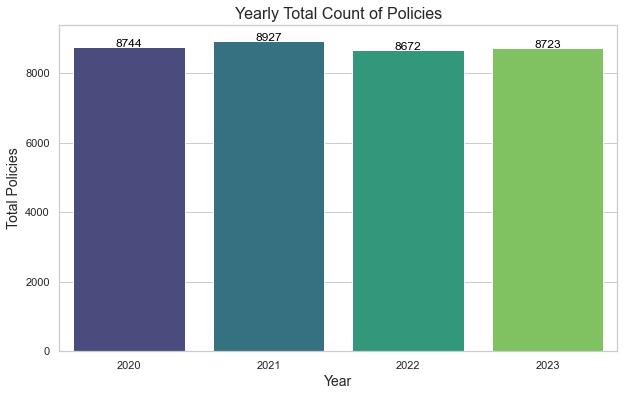

In [19]:
# Set the style of the plot
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Year', y='Total Policies', data=yearly_policy_count, palette='viridis')

# Add titles and labels
plt.title('Yearly Total Count of Policies', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Policies', fontsize=14)

# Add values on top of the bars
for index, row in yearly_policy_count.iterrows():
    bar_plot.text(row.name, row['Total Policies'], round(row['Total Policies'], 2), color='black', ha="center")

# Show the plot
plt.show()

**Q4. What are the top 10 banks with the highest count of unique customers**

In [15]:
# Calculate the unique count of customers by bank
customers_by_bank = data.groupby('bank')['consumer'].nunique().reset_index()
customers_by_bank.columns = ['Bank', 'Total Customers']

# Sort by total customers in descending order
customers_by_bank = customers_by_bank.sort_values(by='Total Customers', ascending=False)

# Select top 10 banks
top_10_banks = customers_by_bank.head(10)

# Display the result
print(top_10_banks)

                                    Bank  Total Customers
19                               AMEX CC            10179
18  AMERICAN EXPRESS BANKING CORPORATION             7076
44                DHANLAXMI BANK LIMITED             4471
3                                    ACH             1410
67                        ONLINE PAYMENT              361
83                   STATE BANK OF INDIA              346
49                        HDFC BANK LTD.              304
53                    ICICI BANK LIMITED              225
28                           CANARA BANK              187
21                         AXIS BANK LTD              132


**Q4. Find out the total count of customers by payment mode**

In [21]:
# Calculate the total count of customers by payment mode
customers_by_payment_mode = data.groupby('payment_mode')['consumer'].nunique().reset_index()
customers_by_payment_mode.columns = ['Payment Mode', 'Total Customers']

# Display the result
print(customers_by_payment_mode)

          Payment Mode  Total Customers
0                 Cash              456
1         Direct Debit            11202
2          Installment             1849
3                 Loan               30
4                Other              654
5  Unknown/Unspecified            10181


**Q5. Find out the total count of customers by policy type**

In [22]:
# Calculate the total count of customers by policy type
customers_by_policy = data.groupby('pol_type')['consumer'].nunique().reset_index()
customers_by_policy.columns = ['Policy Type', 'Total Customers']

# Display the result
print(customers_by_policy)

       Policy Type  Total Customers
0    First Renewal              561
1              NEW              561
2      NTP Renewal             5140
3              New             7648
4  Seconed Renewal              561
5       TP Renewal             9160


**Q6. Find out the total count of customers by policy**

In [25]:
# Calculate the total count of customers by policy
customers_by_policy = data.groupby('policy')['consumer'].nunique().reset_index()
customers_by_policy.columns = ['Policy', 'Total Customers']

# Display the result
print(customers_by_policy)

                   Policy  Total Customers
0   Bajaj Allianz General             3398
1  Cholamandalam MS Gener             4401
2   ICICI Lombard General             6563
3  IFFCO Tokio General In              821
4  Reliance General Insur             3102
5   SBI General Insurance             2703
6  The New India Assuranc                4
7  United India Insurance               61


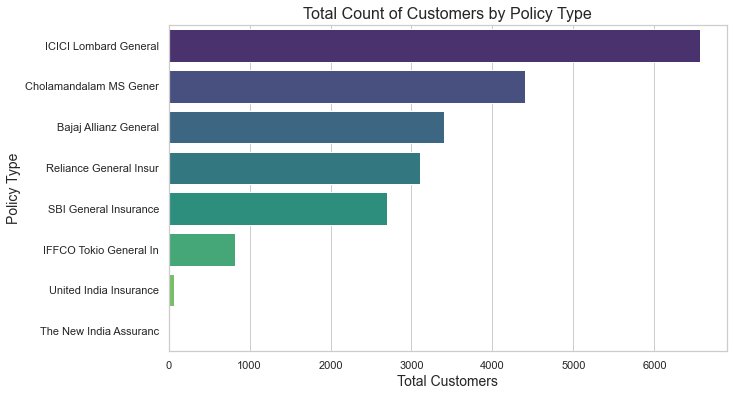

In [30]:
# Sort the data by total customers in ascending order
customers_by_policy = customers_by_policy.sort_values(by='Total Customers', ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Total Customers', y='Policy', data=customers_by_policy, palette='viridis')

# Add titles and labels
plt.title('Total Count of Customers by Policy Type', fontsize=16)
plt.xlabel('Total Customers', fontsize=14)
plt.ylabel('Policy Type', fontsize=14)

# Show the plot
plt.show()

**Q7. Find out the total count of policies by vehicle type**

In [35]:
# Calculate the total count of policies by vehicle type
policy_count_by_vehicle_type = data.groupby('vehicle_type')['pol_id'].count().reset_index()
policy_count_by_vehicle_type.columns = ['Vehicle Type', 'Total Policy Count']

# Sort the data by total policy count in ascending order
policy_count_by_vehicle_type = policy_count_by_vehicle_type.sort_values(by='Total Policy Count', ascending=False)

# Display the result
print(policy_count_by_vehicle_type)

  Vehicle Type  Total Policy Count
4          SUV               17497
1    Hatchback                6740
5        Sedan                6626
2          MPV                2128
6   Sports Car                 670
3       Pickup                 663
7        Wagon                 390
0        Coupe                 352


**Q8. Find out the Total Count Customer By Policy Type**

In [44]:
# Calculate the total count of customers by policy type
customer_count_by_policy_type = data.groupby('pol_type')['consumer'].nunique().reset_index()
customer_count_by_policy_type.columns = ['Policy Type', 'Total Customer Count']

# Sort the result in descending order by total customer count
customer_count_by_policy_type = customer_count_by_policy_type.sort_values(by='Total Customer Count', ascending=False)

# Display the result
print(customer_count_by_policy_type)

       Policy Type  Total Customer Count
5       TP Renewal                  9160
3              New                  7648
2      NTP Renewal                  5140
0    First Renewal                   561
1              NEW                   561
4  Seconed Renewal                   561


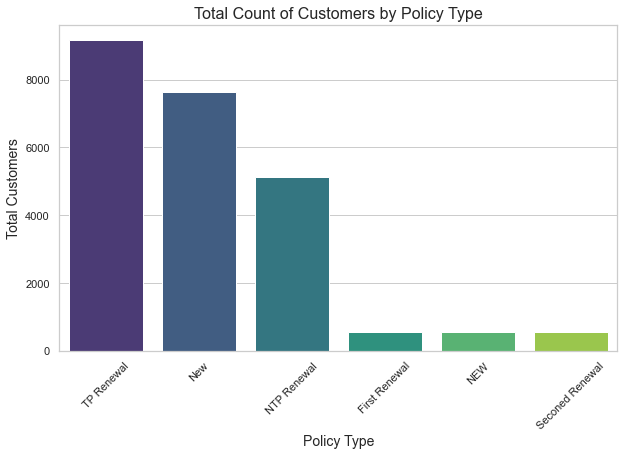

In [47]:
# Create the bar plot using seaborn
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Policy Type', y='Total Customer Count', data=customer_count_by_policy_type, palette='viridis')


# Add titles and labels
plt.title('Total Count of Customers by Policy Type', fontsize=16)
plt.xlabel('Policy Type', fontsize=14)
plt.ylabel('Total Customers', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels

# Show the plot
plt.show()

**9. What is our overall performance in vehicle Insurance?**

In [54]:
# 1. Total Number of Policies
total_policies = data['pol_id'].nunique()

# 2. Total Premium Collected
total_premium = data['gross_premium'].sum()

print(f"Total Number of Policies: {total_policies}")
print(f"Total Premium Collected: {total_premium}")

Total Number of Policies: 35064
Total Premium Collected: 1419881376


In [49]:
# Calculate the unique count of customers
unique_customers = data['consumer'].nunique()

# Calculate the total insurance declared value
total_insured_value = data['insurance_declared_value'].sum()

# Calculate the total number of policies
total_policies = data['pol_id'].nunique()

# Display the results
print(f"Unique Count of Customers: {unique_customers}")
print(f"Total Insurance Declared Value: ${total_insured_value / 1e9:.1f} billion")
print(f"Total Number of Running Policies: {total_policies}")

Unique Count of Customers: 16886
Total Insurance Declared Value: $34.6 billion
Total Number of Running Policies: 35064


> **Observation:** We have 16891 customers with $34.6 billion insured amount and 35066 policies running.

**Q10. Find out the top 10 policies by state**

In [56]:
# Calculate the total number of policies by state
policies_by_state = data.groupby('state')['pol_id'].count().reset_index()
policies_by_state.columns = ['State', 'Total Policies']

# Sort the DataFrame by 'Total Policies' in descending order and select the top 10
top_10_states = policies_by_state.sort_values(by='Total Policies', ascending=False).head(10)

# Display the result
print("\nTop 10 States by Total Number of Policies:")
print(top_10_states)


Top 10 States by Total Number of Policies:
             State  Total Policies
22       Telangana            3315
15     Maharashtra            3126
5     Chhattisgarh            1978
14  Madhya Pradesh            1919
10       Jharkhand            1893
23   Uttar Pradesh            1889
20       Rajasthan            1876
4            Bihar            1694
7          Haryana            1680
6          Gujarat            1632


**Q11. How are my customers Distributed over Banks?**

In [58]:
# 1. Calculate the number of unique customers per bank
customers_by_bank = data.groupby('bank')['consumer'].nunique().reset_index()
customers_by_bank.columns = ['Bank', 'Total Customers']

# Sort the banks by customer count in descending order and select the top 10
top_10_banks = customers_by_bank.sort_values(by='Total Customers', ascending=False).head(10)

# 2. Calculate the number of unique customers per payment mode
customers_by_payment_mode = data.groupby('payment_mode')['consumer'].nunique().reset_index()
customers_by_payment_mode.columns = ['Payment Mode', 'Total Customers']

# Display the results
print("Top 10 Banks by Customer Count:")
print(top_10_banks)

Top 10 Banks by Customer Count:
                                    Bank  Total Customers
19                               AMEX CC            10179
18  AMERICAN EXPRESS BANKING CORPORATION             7076
44                DHANLAXMI BANK LIMITED             4471
3                                    ACH             1410
67                        ONLINE PAYMENT              361
83                   STATE BANK OF INDIA              346
49                        HDFC BANK LTD.              304
53                    ICICI BANK LIMITED              225
28                           CANARA BANK              187
21                         AXIS BANK LTD              132


In [59]:
print("\nCustomers by Payment Mode:")
print(customers_by_payment_mode)


Customers by Payment Mode:
          Payment Mode  Total Customers
0                 Cash              456
1         Direct Debit            11202
2          Installment             1849
3                 Loan               30
4                Other              654
5  Unknown/Unspecified            10181


> **Observation:** Amex cc is popular amongst customers and they like the Direct Debit Facility of payment mode.



**Q12. How do the average gross premiums differ among various insurance packages and vehicle types**

In [61]:
# 1. Average Gross Premium by Package
average_gross_premium_by_package = data.groupby('package')['gross_premium'].mean().reset_index()
average_gross_premium_by_package.columns = ['Package', 'Average Gross Premium']
average_gross_premium_by_package = average_gross_premium_by_package.sort_values(by='Average Gross Premium', ascending=False)

# 2. Average Gross Premium by Vehicle Type
average_gross_premium_by_vehicle_type = data.groupby('vehicle_type')['gross_premium'].mean().reset_index()
average_gross_premium_by_vehicle_type.columns = ['Vehicle Type', 'Average Gross Premium']
average_gross_premium_by_vehicle_type = average_gross_premium_by_vehicle_type.sort_values(by='Average Gross Premium', ascending=False)

# Display the results
print("Average Gross Premium by Package (sorted descending):")
print(average_gross_premium_by_package)

print("\nAverage Gross Premium by Vehicle Type (sorted descending):")
print(average_gross_premium_by_vehicle_type)

Average Gross Premium by Package (sorted descending):
     Package  Average Gross Premium
4     LUXURY           84679.078935
6        RTI           76770.666667
7   STANDARD           65483.433333
5    PREMIUM           59505.161795
1    ADVANCE           39637.263836
0      ADDON           38315.629630
2    DELIGHT           29042.776817
8   SUPERIOR           27084.889888
3  ESSENTIAL           18215.136753
9     Select           11927.384615

Average Gross Premium by Vehicle Type (sorted descending):
  Vehicle Type  Average Gross Premium
0        Coupe           41767.275568
1    Hatchback           41104.533976
2          MPV           40506.812030
5        Sedan           40404.866888
4          SUV           40362.823398
6   Sports Car           40309.071642
3       Pickup           39271.324284
7        Wagon           38311.038462


> **Observation:** Luxury and RTI Package are popular in high end customers whose top 3 vehicle type choices are Sports Car, MPV, SUV.‍

**Q13. Which regions and categories contribute the most to sales?**

In [62]:
# 1. Total Gross Premium by State
gross_premium_by_state = data.groupby('state')['gross_premium'].sum().reset_index()
gross_premium_by_state.columns = ['State', 'Total Gross Premium']
gross_premium_by_state = gross_premium_by_state.sort_values(by='Total Gross Premium', ascending=False)

# 2. Total Gross Premium by Vehicle Type
gross_premium_by_vehicle_type = data.groupby('vehicle_type')['gross_premium'].sum().reset_index()
gross_premium_by_vehicle_type.columns = ['Vehicle Type', 'Total Gross Premium']
gross_premium_by_vehicle_type = gross_premium_by_vehicle_type.sort_values(by='Total Gross Premium', ascending=False)

# Display the results
print("Total Gross Premium by State (sorted descending):")
print(gross_premium_by_state.head(10))  # Display top 10 states

print("\nTotal Gross Premium by Vehicle Type (sorted descending):")
print(gross_premium_by_vehicle_type)

Total Gross Premium by State (sorted descending):
             State  Total Gross Premium
22       Telangana            133670003
15     Maharashtra            128361682
5     Chhattisgarh             78182496
10       Jharkhand             77810559
23   Uttar Pradesh             77343272
14  Madhya Pradesh             75293993
20       Rajasthan             74625798
7          Haryana             70595736
4            Bihar             68608955
6          Gujarat             65308744

Total Gross Premium by Vehicle Type (sorted descending):
  Vehicle Type  Total Gross Premium
4          SUV            706228321
1    Hatchback            277044559
5        Sedan            267722648
2          MPV             86198496
6   Sports Car             27007078
3       Pickup             26036888
7        Wagon             14941305
0        Coupe             14702081


### Outcome:

> In conclusion, our analysis reveals distinct preferences and behaviors among our clientele. High-end customers exhibit a strong preference for luxury and the RTI Package, with Sports Cars, MPVs, and SUVs emerging as their vehicles of choice. Furthermore, there's a noticeable trend towards TP Renewal, with SUVs standing out as the favored vehicle type. The payment preferences of our customers lean towards the convenience of American Express credit cards and the Direct Debit Facility, highlighting their desire for streamlined transactions. Impressively, our current customer base encompasses 16,891 individuals, collectively insuring an amount of $34.6 billion across 35,066 policies